In [13]:
from helpers  import getSingleExp_df
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.cloud import firestore
from matplotlib.pyplot import figure

#Change the group name printed at the end of running multi_solve.py
group = 'BetSum18_20K2'

In [17]:
#Firestore DB Client
db = firestore.Client.from_service_account_json('utp-320721-e1afef9ba011.json')

#Getting Experiment IDs 
group_Ref = db.collection('experimentGroups').document(group)
docs = group_Ref.collection('experiments').get()
df_ids ={}
for doc in docs:
    if(doc.id.split('_')[0]=='LS'):
        df_ids['LS'] = doc.id
    elif(doc.id.split('_')[0]== 'MSM'):
        df_ids['MSM'] = doc.id
    elif(doc.id.split('_')[0]=='SM'):
        df_ids['SM'] = doc.id

print(df_ids)

#Getting pandas dataframs with those IDs from BigQuery
#You can add more columns if you like, columns are: 'EID', 'Iteration', 'Temperature', 'Best_SP', 'Current_SP',  'Feasibility', 'TimeElapsed'
ls = getSingleExp_df(EID=df_ids['LS'], columns='Iteration, Best_SP, Temperature, TimeElapsed')
sm = getSingleExp_df(EID=df_ids['SM'], columns='Iteration, Best_SP, Temperature, TimeElapsed')
msm = getSingleExp_df(EID=df_ids['MSM'] , columns='Iteration, Best_SP, Temperature, TimeElapsed')

#Combining Dataframe
combined = pd.DataFrame()
combined['Local_Search'] = ls['Best_SP']
combined['SM'] = sm['Best_SP']
combined['Modified_SM'] = msm['Best_SP']

combined.cumsum()

combined = pd.DataFrame()
new_df = pd.read_excel('Data\\BetSum18_20K2\\CSV\\Small_Graph.xlsx')

combined['Local_Search'] = new_df['LS']
combined['SM'] = new_df['SM']
combined['Modified_SM'] = new_df['MSM']

combined.cumsum()

{'LS': 'LS_1627417227', 'MSM': 'MSM_1627419741', 'SM': 'SM_1627417435'}
Getting data from experiment LS_1627417227, with columns Iteration, Best_SP, Temperature, TimeElapsed
Getting data from experiment SM_1627417435, with columns Iteration, Best_SP, Temperature, TimeElapsed
Getting data from experiment MSM_1627419741, with columns Iteration, Best_SP, Temperature, TimeElapsed


,Local_Search,SM,Modified_SM
0,201360,203280,205260
1,402720,406560,410520
2,600720,606000,615780
3,798720,801600,821040
4,994704,997200,1026300
...,...,...,...
19996,3143484138,3024131654,2753399946
19997,3143641230,3024275115,2753525363
19998,3143798322,3024418576,2753650780
19999,3143955414,3024562037,2753776197


<Figure size 432x288 with 0 Axes>

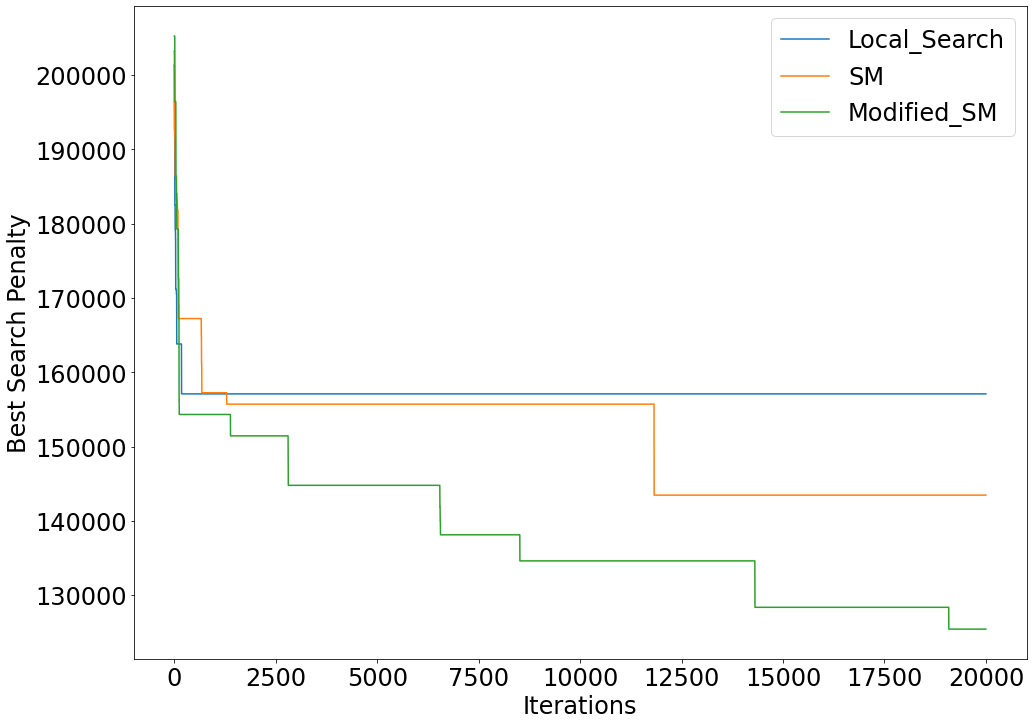

In [18]:
#Creating Path under group name
import pathlib
pathlib.Path(f'Data\\{group}\\CSV').mkdir(parents=True, exist_ok=True) 
pathlib.Path(f'Data\\{group}\\Plots').mkdir(parents=True, exist_ok=True) 



#Setting parameters and plotting
plt.rcParams["font.size"] = "24"
plt.figure()

ax = combined.plot(figsize=(16,12))

ax.set_xlabel("Iterations")
ax.set_ylabel("Best Search Penalty")


##
fig=ax.get_figure()
fig.savefig(f'Data\\{group}\\Plots\\{group}.png')

In [16]:
#Saving to CSV file
ls.to_csv(f'Data\\{group}\\CSV\\LS.csv')
sm.to_csv(f'Data\\{group}\\CSV\\SM.csv')
msm.to_csv(f'Data\\{group}\\CSV\\MSM.csv')

In [5]:
#Saving plot
#plt.savefig(f'Data\\{group}\\Plots\\{group}.png')
